In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime

In [35]:
batch_size = 16
input_dim = 28

units = 42
output_size = 10

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    lstm_layer = keras.layers.RNN(
        keras.layers.LSTMCell(units), input_shape=(None, input_dim)
    )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [36]:
mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
%load_ext tensorboard

model = build_model(allow_cudnn_kernel=False)
display(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=5, callbacks=[tensorboard_callback]
)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_7 (RNN)                  (None, 42)                11928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 42)                168       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                430       
Total params: 12,526
Trainable params: 12,442
Non-trainable params: 84
_________________________________________________________________


None

2021-11-03 21:10:58.312757: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-03 21:10:58.312876: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-03 21:10:58.312993: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_MULTIPLE_SUBSCRIBERS_NOT_SUPPORTED
2021-11-03 21:10:58.313232: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/5
   9/3750 [..............................] - ETA: 1:37 - loss: 2.4948 - accuracy: 0.1528

2021-11-03 21:10:59.247198: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-03 21:10:59.247237: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-03 21:10:59.247308: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_MULTIPLE_SUBSCRIBERS_NOT_SUPPORTED
2021-11-03 21:10:59.317134: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-03 21:10:59.319909: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-03 21:10:59.323330: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-03 21:10:59.344207: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211103-211058/train/

3750/3750 [==============================] - 26s 7ms/step - loss: 0.7345 - accuracy: 0.7357 - val_loss: 0.5500 - val_accuracy: 0.7966
Epoch 2/5
3750/3750 [==============================] - 24s 6ms/step - loss: 0.5295 - accuracy: 0.8125 - val_loss: 0.4909 - val_accuracy: 0.8245
Epoch 3/5
3750/3750 [==============================] - 28s 7ms/step - loss: 0.4792 - accuracy: 0.8277 - val_loss: 0.4499 - val_accuracy: 0.8383
Epoch 4/5
3750/3750 [==============================] - 22s 6ms/step - loss: 0.4521 - accuracy: 0.8393 - val_loss: 0.4382 - val_accuracy: 0.8409
Epoch 5/5
3750/3750 [==============================] - 20s 5ms/step - loss: 0.4343 - accuracy: 0.8452 - val_loss: 0.4478 - val_accuracy: 0.8400


(28, 28)
Predicted result is: [8], target result is: 8


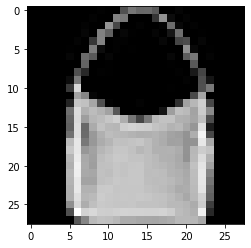

In [34]:
sample_idx = 34
sample, sample_label = x_test[sample_idx], y_test[sample_idx]
print(sample.shape)

result = tf.argmax(model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
print(
    "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
)
plt.imshow(sample, cmap=plt.get_cmap("gray"))

plt.show()